In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")
palette = sns.diverging_palette(220, 20, sep = 20, n = 150)
sns.set_palette(palette)

# Load Data

In [2]:
df = pd.read_csv('./Data/data_eda.csv')
pd.set_option('display.max_columns', len(df.columns))
df.head()

,price,security_deposit,cleaning_fee,guests_included,maximum_nights,accommodates,cancellation_policy,bedrooms,bed_type,bathrooms,zipcode,room_type,number_of_reviews,property_type,neighbourhood_cleansed,beds,logPrice,check_in_24h,air_conditioning,bbq,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,refrigerator,secure,self_check_in,latitude_longitude_bin,price_log,accommodates_bedroom_ratio,accommodates_bathroom_ratio
0,122.0,500.000000,240.0,3,730,6,6,2.0,4,2.0,298,0,2,15,53,3.0,4.804021,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,13,4.804021,3.0,3.000000
1,168.0,0.000000,100.0,6,14,6,0,3.0,4,1.0,161,0,6,25,31,3.0,5.123964,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,38,5.123964,2.0,6.000000
2,79.0,480.000000,89.0,1,366,1,6,1.0,4,1.5,267,1,20,1,99,1.0,4.369448,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,26,4.369448,1.0,0.666667
3,140.0,453.166605,100.0,1,180,1,6,1.0,3,1.0,27,1,18,1,192,1.0,4.941642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25,4.941642,1.0,1.000000
4,80.0,100.000000,75.0,1,730,2,6,1.0,4,1.0,49,0,0,1,22,1.0,4.382027,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9,4.382027,2.0,2.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38974 entries, 0 to 38973
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        38974 non-null  float64
 1   security_deposit             38974 non-null  float64
 2   cleaning_fee                 38974 non-null  float64
 3   guests_included              38974 non-null  int64  
 4   maximum_nights               38974 non-null  int64  
 5   accommodates                 38974 non-null  int64  
 6   cancellation_policy          38974 non-null  int64  
 7   bedrooms                     38974 non-null  float64
 8   bed_type                     38974 non-null  int64  
 9   bathrooms                    38974 non-null  float64
 10  zipcode                      38974 non-null  int64  
 11  room_type                    38974 non-null  int64  
 12  number_of_reviews            38974 non-null  int64  
 13  property_type   

# Prepare functions for Plotting

In [4]:
def get_sub_plot(width = 20, height = 10, label_font_size = 14, tick_font_size = 13):
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    ax.tick_params(labelsize = tick_font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)
    return ax

def plot_joint_plot(x, y, df):
    #ax = get_sub_plot()
    sns.jointplot(x = x, y = y, data = df, kind = 'reg')
    plt.show()
    
def plot_box_plot(x, y, data):
    ax = get_sub_plot()
    sns.boxplot(x = x, y = y, data = df, ax = ax)
    plt.show()

## Questions 1: Are there variables that are particularly significant in terms of predicting LA Airbnb listing price?

## Assuming listing price is porportional to accommodates, bedrooms, bathrooms. Let's verify.

### Pearson’s correlation coefficient
Pearson’s correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables.  It is known as the best method of measuring the association between variables of interest because it is based on the method of covariance.  It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship.

- Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).
- High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
- Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
- Low degree: When the value lies below + .29, then it is said to be a small correlation.
- No correlation: When the value is zero.

In [5]:
from scipy import stats

def report_pearson(x, y, data):
    correlation, p = stats.pearsonr(df[x], df[y])
    print('{:10s} {:10.2f} {:10.2f}'.format('pearson', correlation, p))

def report_numerical_x_vs_numerical_y(variables, y, df):
    for var in variables:
        print(var + ':')
        report_pearson(var, y, df)
        plot_joint_plot(var, y, df)

In [6]:
df.columns

Index(['price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'maximum_nights', 'accommodates', 'cancellation_policy', 'bedrooms',
       'bed_type', 'bathrooms', 'zipcode', 'room_type', 'number_of_reviews',
       'property_type', 'neighbourhood_cleansed', 'beds', 'logPrice',
       'check_in_24h', 'air_conditioning', 'bbq', 'balcony', 'bed_linen',
       'breakfast', 'tv', 'coffee_machine', 'cooking_basics', 'white_goods',
       'elevator', 'gym', 'child_friendly', 'parking', 'outdoor_space',
       'host_greeting', 'hot_tub_sauna_or_pool', 'internet', 'long_term_stays',
       'pets_allowed', 'private_entrance', 'refrigerator', 'secure',
       'self_check_in', 'latitude_longitude_bin', 'price_log',
       'accommodates_bedroom_ratio', 'accommodates_bathroom_ratio'],
      dtype='object')

## Checking main features correlation

accommodates:
pearson          0.39       0.00


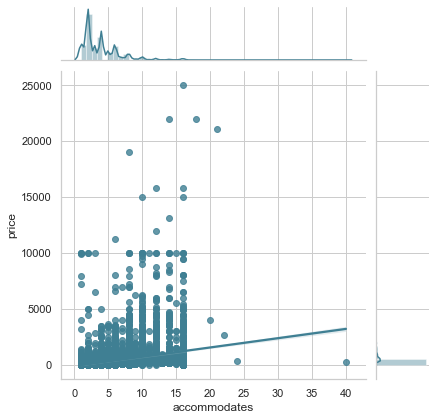

bedrooms:
pearson          0.48       0.00


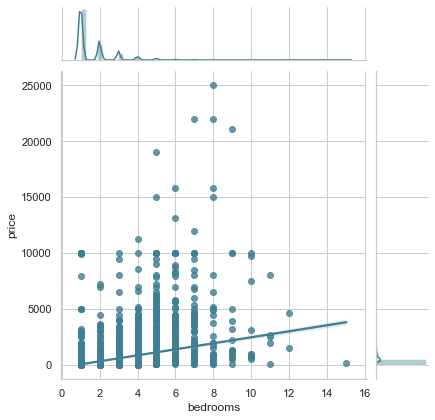

bathrooms:
pearson          0.54       0.00


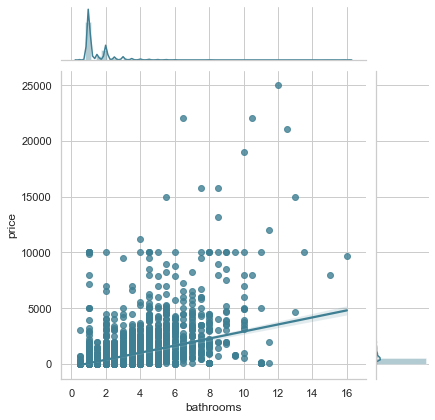

beds:
pearson          0.31       0.00


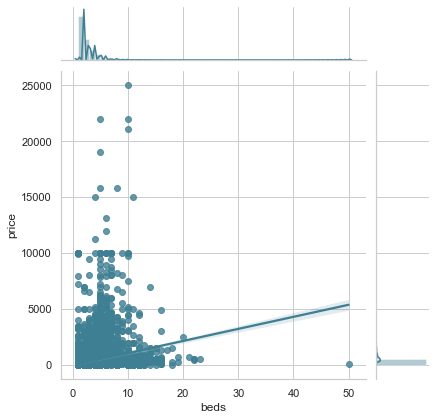

In [7]:
y = 'price'
variables = ['accommodates', 'bedrooms', 'bathrooms', 'beds']

report_numerical_x_vs_numerical_y(variables, y, df)

As expected, accommodates, bedrooms, bathrooms, beds all have pearson's correlation coefficient > 0.3, which correlate well with listing price. There for a medium degree relationship exists here.

## Assuming listing price is correlated with property type & neighborhood. Let's verify.

property_type:
pearson          0.15       0.00


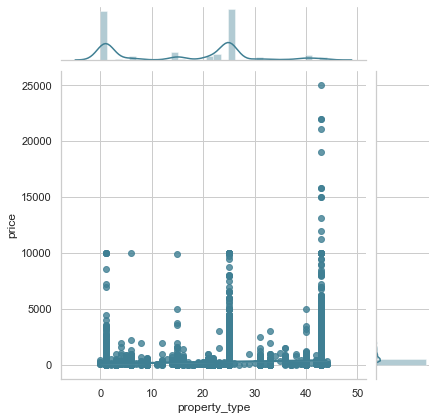

neighbourhood_cleansed:
pearson         -0.05       0.00


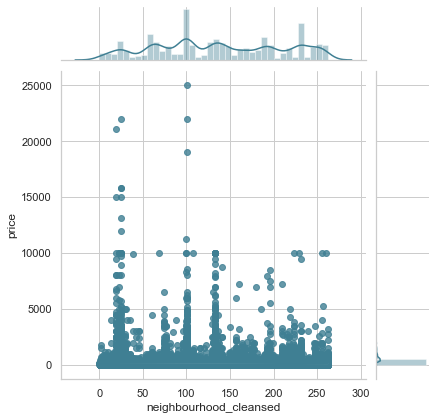

In [8]:
y = 'price'
variables = ['property_type','neighbourhood_cleansed']

report_numerical_x_vs_numerical_y(variables, y, df)

In [9]:
import statsmodels.api as sm

def logistic_test(X, y, df):
    y = df[y] / np.max(df[y])

    logit_model = sm.Logit(y, X)
    result = logit_model.fit()
    print(result.summary2())

def report_categorical_x_vs_numerical_y(x, y, df):
    df_x_onehot = pd.get_dummies(df[x], prefix = x)
    logistic_test(X = df_x_onehot, y = y, df = df)
    plot_box_plot(x = x, y = y, data = df)

Optimization terminated successfully.
         Current function value: 0.010730
         Iterations 11
                          Results: Logit
Model:                Logit            Pseudo R-squared: -6.612   
Dependent Variable:   price            AIC:              924.3431 
Date:                 2020-12-05 23:07 BIC:              1301.4517
No. Observations:     38974            Log-Likelihood:   -418.17  
Df Model:             43               LL-Null:          -54.934  
Df Residuals:         38930            LLR p-value:      1.0000   
Converged:            1.0000           Scale:            1.0000   
No. Iterations:       11.0000                                     
------------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
property_type_0  -4.9252   3.1592  -1.5590 0.1190 -11.1172  1.2667
property_type_1  -5.1134   0.1104 -46.3045 0.0000  -

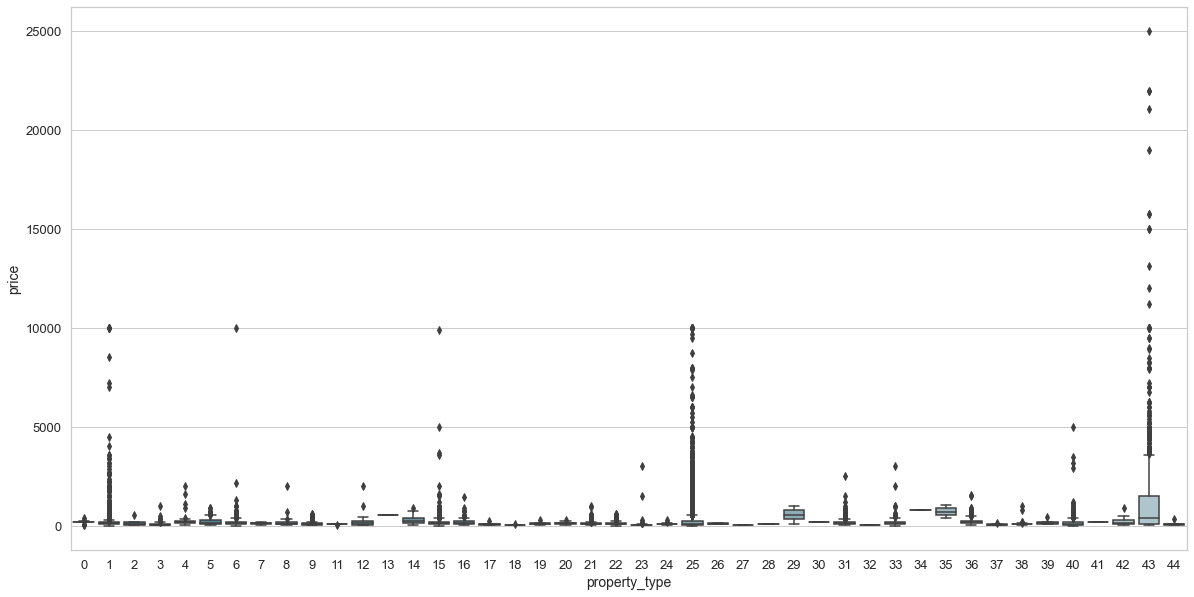

In [10]:
report_categorical_x_vs_numerical_y(x = 'property_type', y = 'price', df = df)

According to above summary, property_type 1, 3, 4, 5, 6, 8, 9, 12, 15, 16, 21, 22, 23, 24, 25, 31, 33, 35, 36, 37, 38, 39, 40, 42, 43, 44 have p-value less than 0.05 so they do correlate with price.

Optimization terminated successfully.
         Current function value: 0.010939
         Iterations 12
                               Results: Logit
Model:                  Logit                Pseudo R-squared:     -6.761   
Dependent Variable:     price                AIC:                  1376.6700
Date:                   2020-12-05 23:07     BIC:                  3622.1803
No. Observations:       38974                Log-Likelihood:       -426.34  
Df Model:               261                  LL-Null:              -54.934  
Df Residuals:           38712                LLR p-value:          1.0000   
Converged:              1.0000               Scale:                1.0000   
No. Iterations:         12.0000                                             
----------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
----------------------------------------------------------------------------
neig

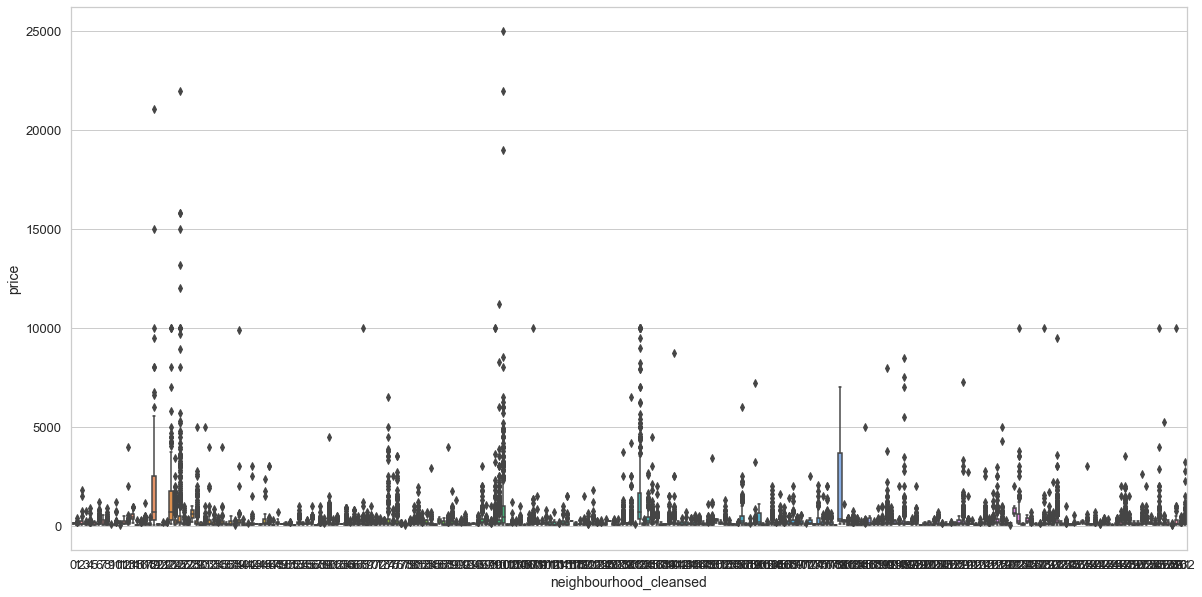

In [11]:
report_categorical_x_vs_numerical_y(x = 'neighbourhood_cleansed', y = 'price', df = df)

Above summary shows that most of the neighborhood do correlate with price as their p-value is less than 0.05.

As expected, property type and neighborhood_cleansed are correlated with listing price. They have a low degree association with price.

# Question 2: Are there strong correlations between pairs of independent variables?

Independent variables: bedrooms, bathrooms, beds, accommodates, property_type, neighborhood.

Let's check the correlation between them:

- bedrooms & bathrooms
- bedrooms & beds.
- bathrooms & beds.
- beds & accommodates.
- bedrooms & accommodates.
- bathrooms & accommodates.
- property & bedrooms.
- property & beds.
- property & bathromms.
- property & accommodates.
- neighbourhood_cleansed & bedrooms.
- neighbourhood_cleansed & beds.
- neighbourhood_cleansed & bathromms.
- neighbourhood_cleansed & accommodates.

bedrooms:
pearson          0.74       0.00


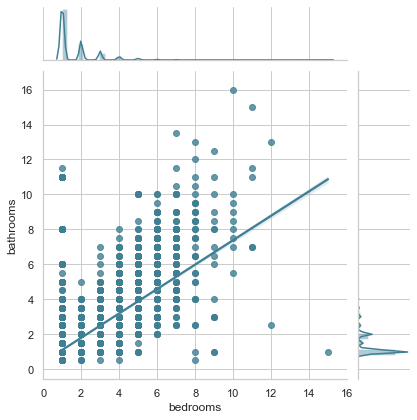

In [12]:
report_numerical_x_vs_numerical_y(['bedrooms'], 'bathrooms', df)

bedrooms:
pearson          0.72       0.00


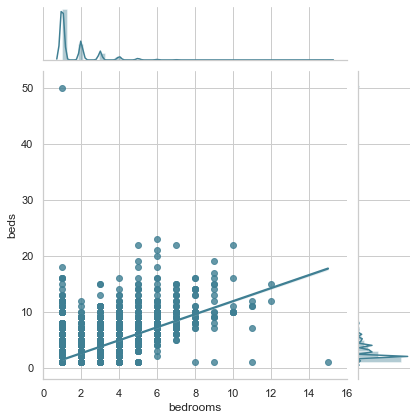

In [13]:
report_numerical_x_vs_numerical_y(['bedrooms'], 'beds', df)

bathrooms:
pearson          0.60       0.00


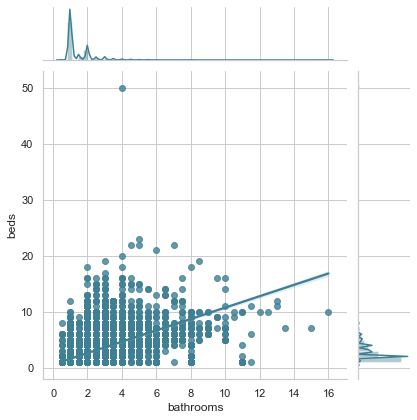

In [14]:
report_numerical_x_vs_numerical_y(['bathrooms'], 'beds', df)

beds:
pearson          0.77       0.00


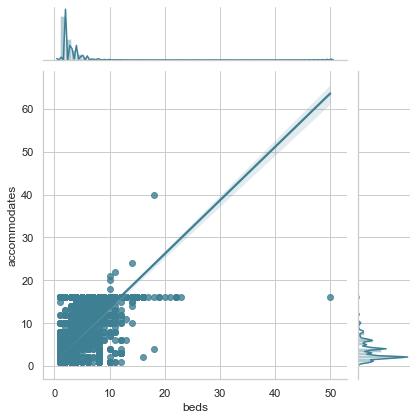

In [15]:
report_numerical_x_vs_numerical_y(['beds'], 'accommodates', df)

bedrooms:
pearson          0.81       0.00


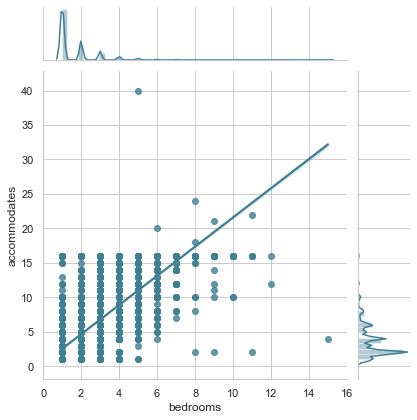

In [16]:
report_numerical_x_vs_numerical_y(['bedrooms'], 'accommodates', df)

bathrooms:
pearson          0.61       0.00


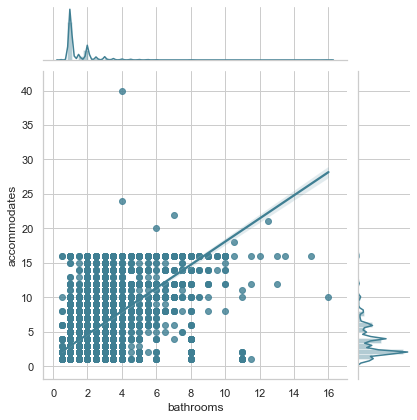

In [17]:
report_numerical_x_vs_numerical_y(['bathrooms'], 'accommodates', df)

Optimization terminated successfully.
         Current function value: 0.179141
         Iterations 7
                          Results: Logit
Model:               Logit            Pseudo R-squared: -27.819   
Dependent Variable:  bedrooms         AIC:              14051.6649
Date:                2020-12-05 23:08 BIC:              14428.7735
No. Observations:    38974            Log-Likelihood:   -6981.8   
Df Model:            43               LL-Null:          -242.27   
Df Residuals:        38930            LLR p-value:      1.0000    
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      7.0000                                       
------------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
property_type_0  -2.3671   0.9547  -2.4794 0.0132  -4.2383 -0.4959
property_type_1  -2.3311   0.0300 -77.7972 0.0000  -2

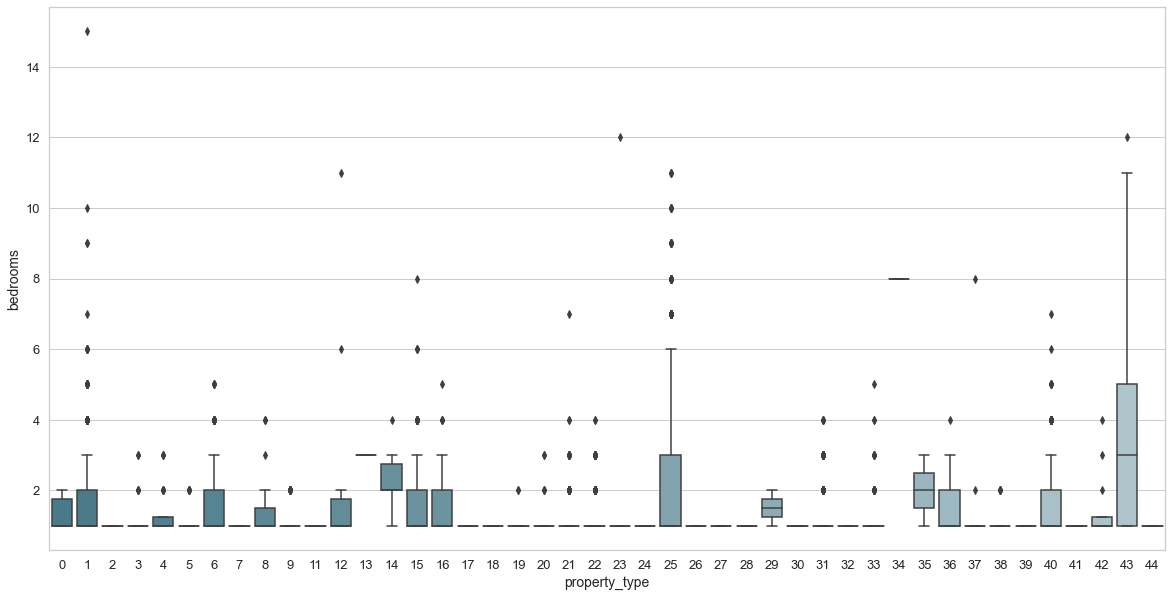

In [18]:
report_categorical_x_vs_numerical_y(x = 'property_type', y = 'bedrooms', df = df)

Above summary shows that most of the property type do correlate with bedrooms as their p-value is less than 0.05.

Optimization terminated successfully.
         Current function value: 0.057755
         Iterations 8
                          Results: Logit
Model:                Logit            Pseudo R-squared: -149.805 
Dependent Variable:   beds             AIC:              4589.9049
Date:                 2020-12-05 23:09 BIC:              4967.0135
No. Observations:     38974            Log-Likelihood:   -2251.0  
Df Model:             43               LL-Null:          -14.926  
Df Residuals:         38930            LLR p-value:      1.0000   
Converged:            1.0000           Scale:            1.0000   
No. Iterations:       8.0000                                      
------------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
property_type_0  -3.0063   1.2610  -2.3841 0.0171  -5.4778 -0.5348
property_type_1  -3.2989   0.0459 -71.8040 0.0000  -3

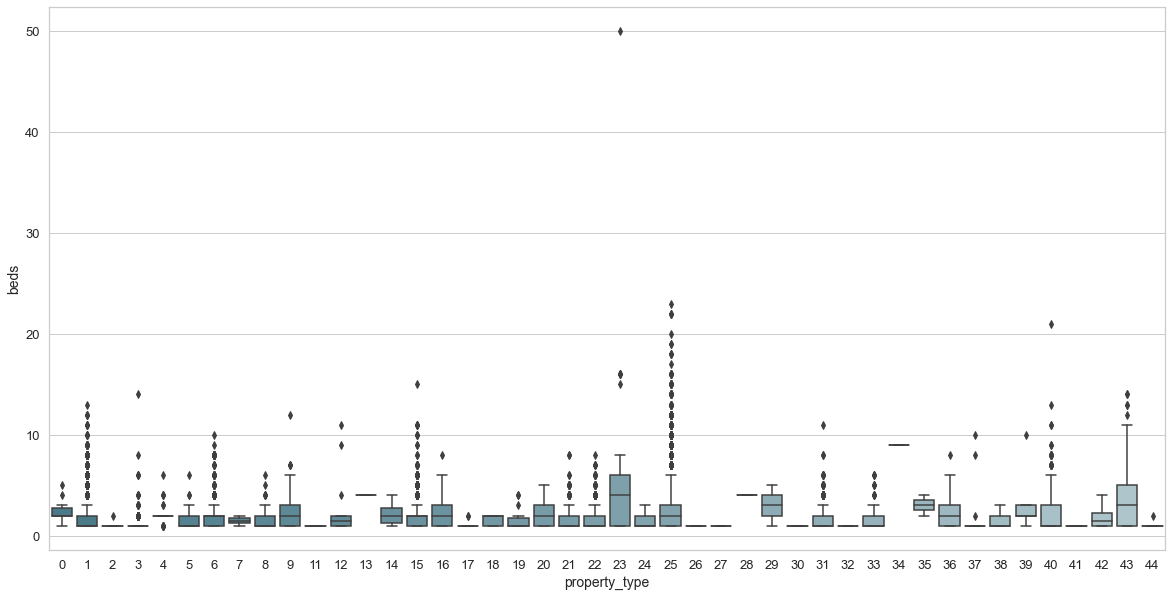

In [19]:
report_categorical_x_vs_numerical_y(x = 'property_type', y = 'beds', df = df)

Above summary shows that most of the property type do correlate with beds as their p-value is less than 0.05.

Optimization terminated successfully.
         Current function value: 0.153672
         Iterations 7
                          Results: Logit
Model:               Logit            Pseudo R-squared: -17.449   
Dependent Variable:  bathrooms        AIC:              12066.4226
Date:                2020-12-05 23:09 BIC:              12443.5312
No. Observations:    38974            Log-Likelihood:   -5989.2   
Df Model:            43               LL-Null:          -324.64   
Df Residuals:        38930            LLR p-value:      1.0000    
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      7.0000                                       
------------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
property_type_0  -2.4681   0.9959  -2.4783 0.0132  -4.4200 -0.5162
property_type_1  -2.4648   0.0317 -77.8025 0.0000  -2

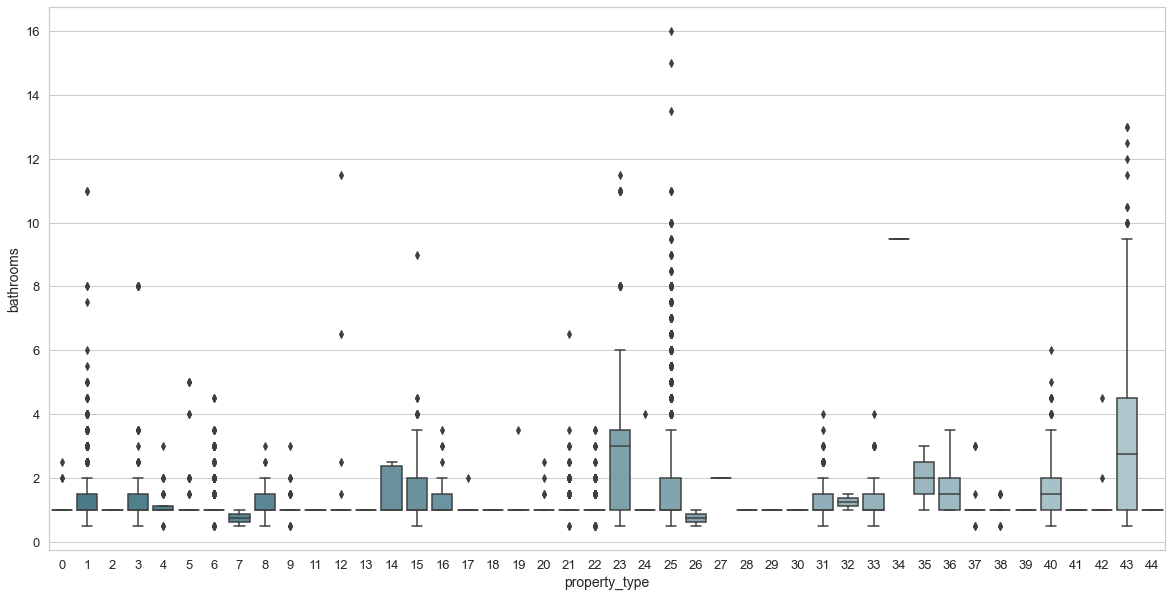

In [20]:
report_categorical_x_vs_numerical_y(x = 'property_type', y = 'bathrooms', df = df)

Optimization terminated successfully.
         Current function value: 0.156979
         Iterations 7
                          Results: Logit
Model:               Logit            Pseudo R-squared: -169.948  
Dependent Variable:  accommodates     AIC:              12324.1689
Date:                2020-12-05 23:09 BIC:              12701.2775
No. Observations:    38974            Log-Likelihood:   -6118.1   
Df Model:            43               LL-Null:          -35.789   
Df Residuals:        38930            LLR p-value:      1.0000    
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      7.0000                                       
------------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
property_type_0  -2.0835   0.8518  -2.4461 0.0144  -3.7529 -0.4141
property_type_1  -2.3714   0.0305 -77.8358 0.0000  -2

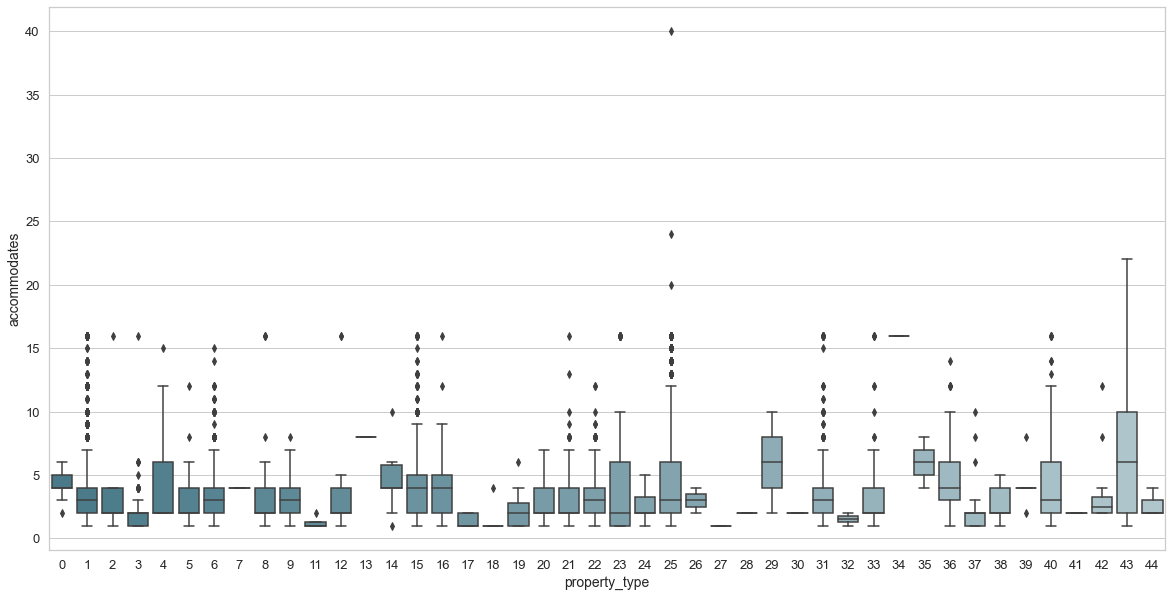

In [21]:
report_categorical_x_vs_numerical_y(x = 'property_type', y = 'accommodates', df = df)

Optimization terminated successfully.
         Current function value: 0.179127
         Iterations 7
                               Results: Logit
Model:                   Logit               Pseudo R-squared:    -27.817   
Dependent Variable:      bedrooms            AIC:                 14486.5757
Date:                    2020-12-05 23:09    BIC:                 16732.0860
No. Observations:        38974               Log-Likelihood:      -6981.3   
Df Model:                261                 LL-Null:             -242.27   
Df Residuals:            38712               LLR p-value:         1.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          7.0000                                             
----------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
----------------------------------------------------------------------------
neigh

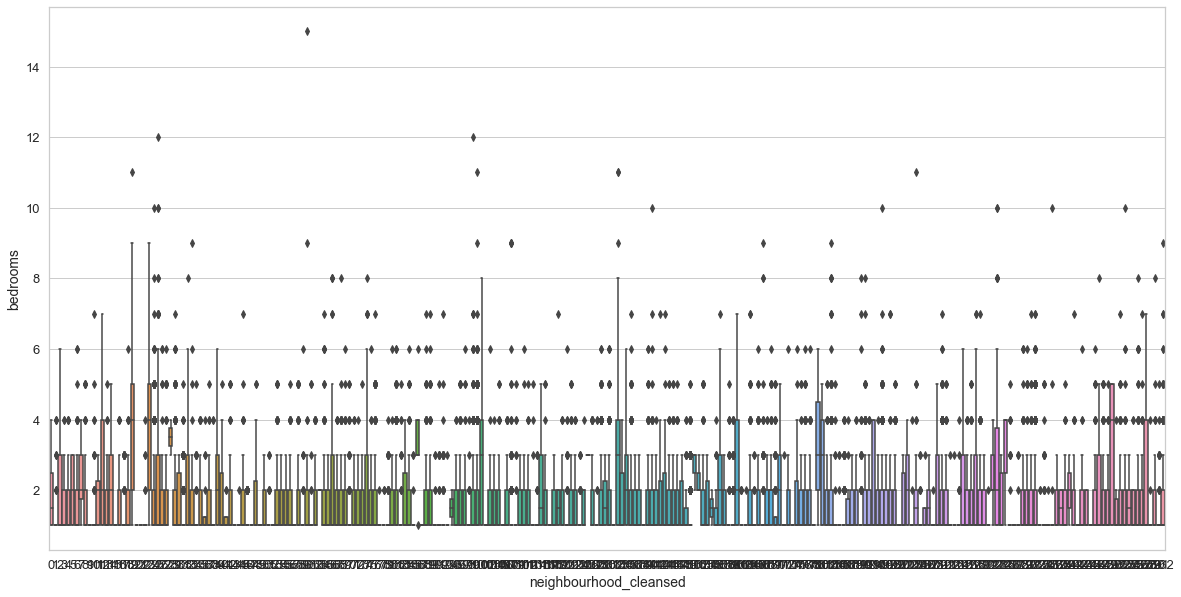

In [22]:
report_categorical_x_vs_numerical_y(x = 'neighbourhood_cleansed', y = 'bedrooms', df = df)

Optimization terminated successfully.
         Current function value: 0.057773
         Iterations 8
                               Results: Logit
Model:                  Logit                Pseudo R-squared:     -149.851 
Dependent Variable:     beds                 AIC:                  5027.3045
Date:                   2020-12-05 23:09     BIC:                  7272.8148
No. Observations:       38974                Log-Likelihood:       -2251.7  
Df Model:               261                  LL-Null:              -14.926  
Df Residuals:           38712                LLR p-value:          1.0000   
Converged:              1.0000               Scale:                1.0000   
No. Iterations:         8.0000                                              
----------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
----------------------------------------------------------------------------
neigh

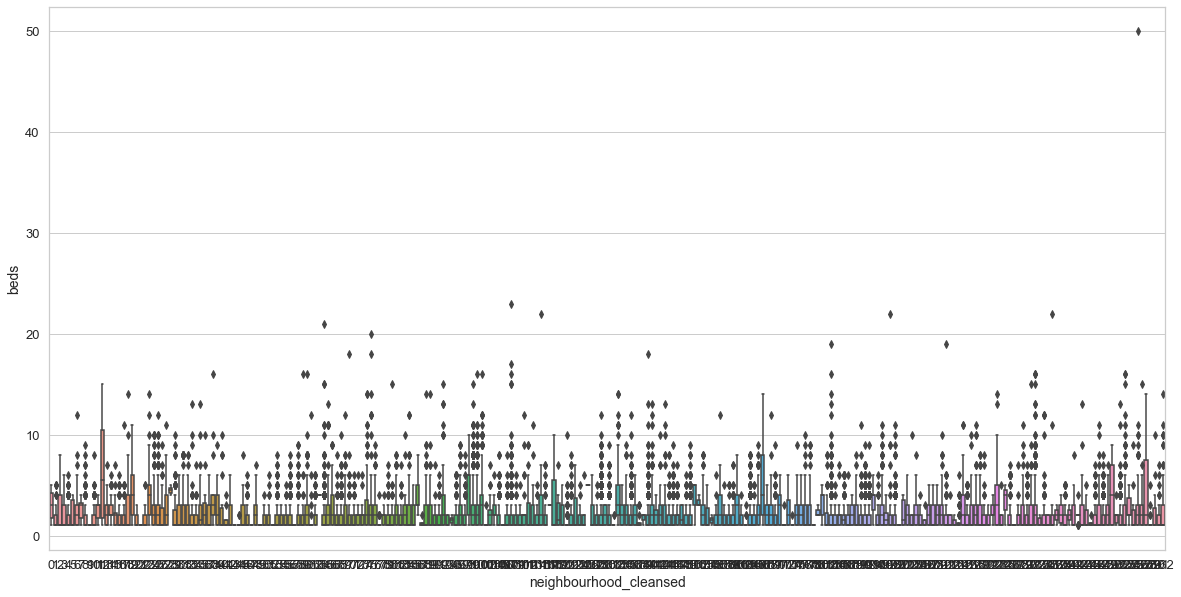

In [23]:
report_categorical_x_vs_numerical_y(x = 'neighbourhood_cleansed', y = 'beds', df = df)

Optimization terminated successfully.
         Current function value: 0.153663
         Iterations 7
                               Results: Logit
Model:                   Logit               Pseudo R-squared:    -17.448   
Dependent Variable:      bathrooms           AIC:                 12501.7464
Date:                    2020-12-05 23:09    BIC:                 14747.2567
No. Observations:        38974               Log-Likelihood:      -5988.9   
Df Model:                261                 LL-Null:             -324.64   
Df Residuals:            38712               LLR p-value:         1.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          7.0000                                             
----------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
----------------------------------------------------------------------------
neigh

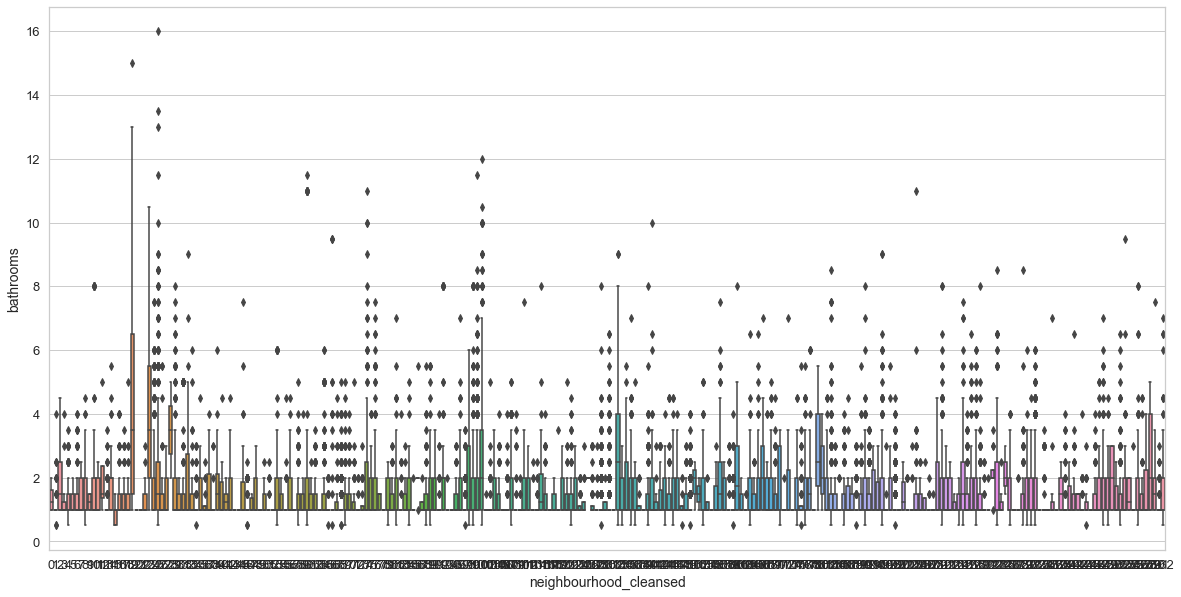

In [24]:
report_categorical_x_vs_numerical_y(x = 'neighbourhood_cleansed', y = 'bathrooms', df = df)

Optimization terminated successfully.
         Current function value: 0.157055
         Iterations 7
                               Results: Logit
Model:                   Logit               Pseudo R-squared:    -170.031  
Dependent Variable:      accommodates        AIC:                 12766.0905
Date:                    2020-12-05 23:09    BIC:                 15011.6008
No. Observations:        38974               Log-Likelihood:      -6121.0   
Df Model:                261                 LL-Null:             -35.789   
Df Residuals:            38712               LLR p-value:         1.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          7.0000                                             
----------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
----------------------------------------------------------------------------
neigh

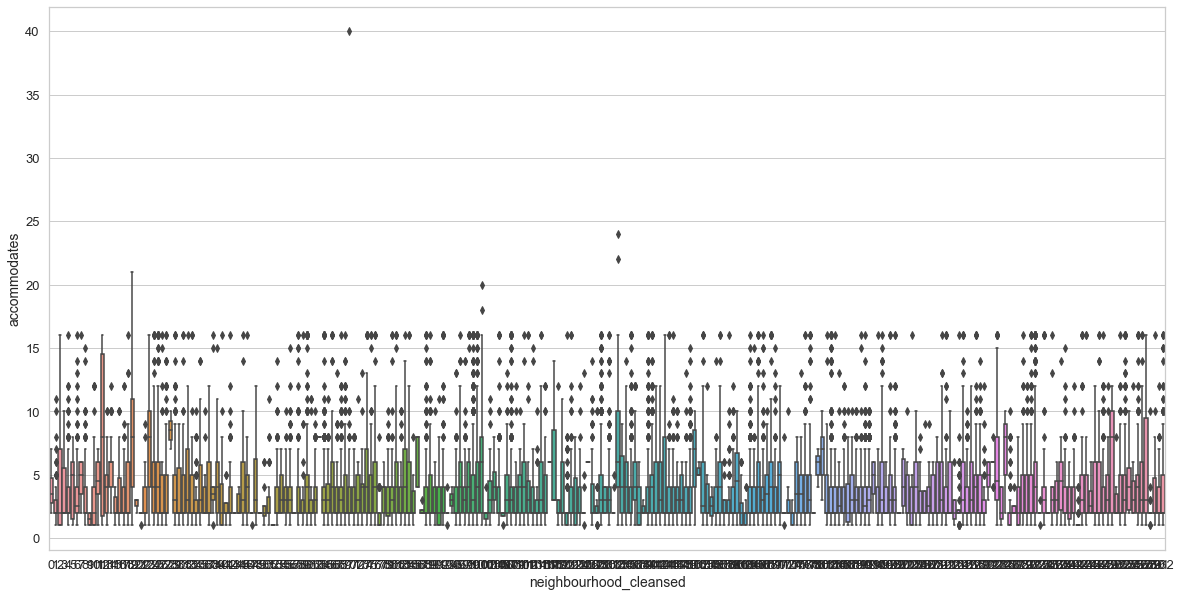

In [25]:
report_categorical_x_vs_numerical_y(x = 'neighbourhood_cleansed', y = 'accommodates', df = df)

Based on the above tests, the following independent variables are correlated:

+ bedrooms & bathrooms
+ bedrooms & beds.
+ bathrooms & beds.
+ beds & accommodates.
+ bedrooms & accommodates.
+ bathrooms & accommodates.
+ property & bedrooms.
+ property & beds.
+ property & bathromms.
+ property & accommodates.
+ neighbourhood_cleansed & bedrooms.
+ neighbourhood_cleansed & beds.
+ neighbourhood_cleansed & bathromms.
+ neighbourhood_cleansed & accommodates.

## Assuming listing price is porportional to some amenities. Let's verify.

## Checking main amenities correlation

check_in_24h:
pearson         -0.01       0.29


/Users/gurpreetkaur/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


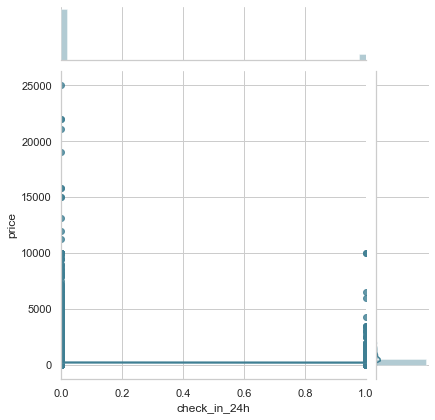

air_conditioning:
pearson          0.05       0.00


/Users/gurpreetkaur/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


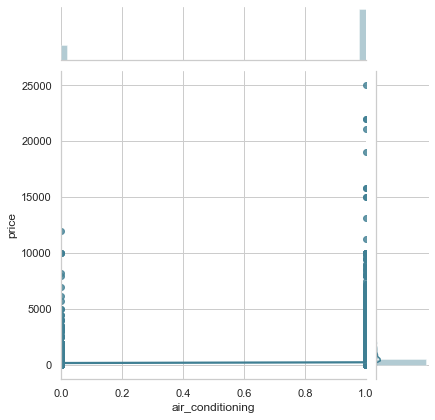

bbq:
pearson          0.09       0.00


/Users/gurpreetkaur/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


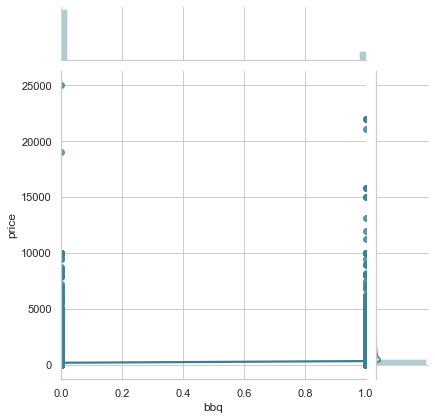

balcony:
pearson          0.04       0.00


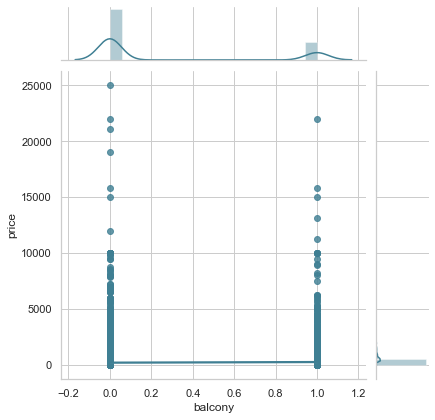

bed_linen:
pearson         -0.02       0.00


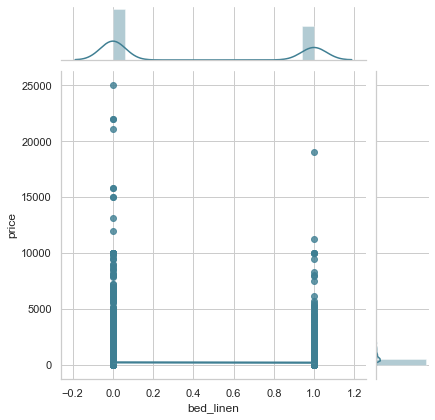

breakfast:
pearson          0.06       0.00


/Users/gurpreetkaur/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


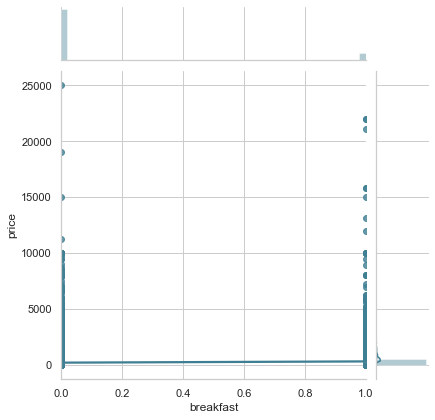

tv:
pearson          0.09       0.00


/Users/gurpreetkaur/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


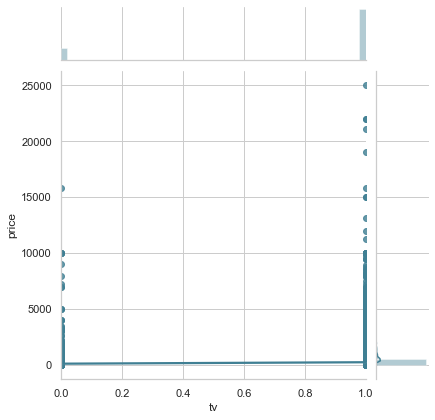

coffee_machine:
pearson          0.02       0.00


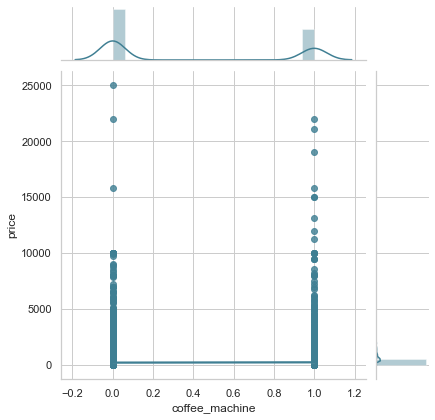

cooking_basics:
pearson         -0.00       0.58


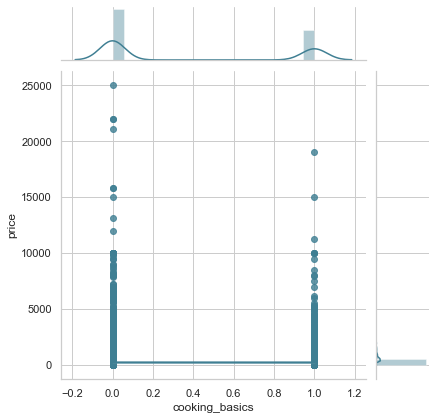

white_goods:
pearson          0.08       0.00


/Users/gurpreetkaur/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


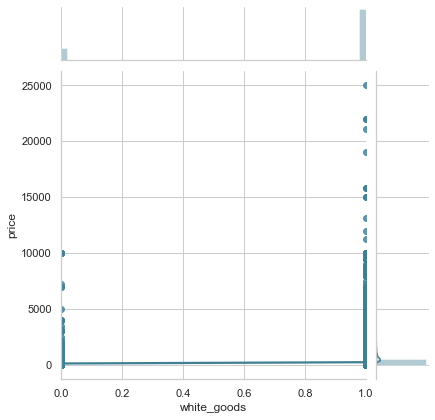

elevator:
pearson          0.00       0.34


/Users/gurpreetkaur/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


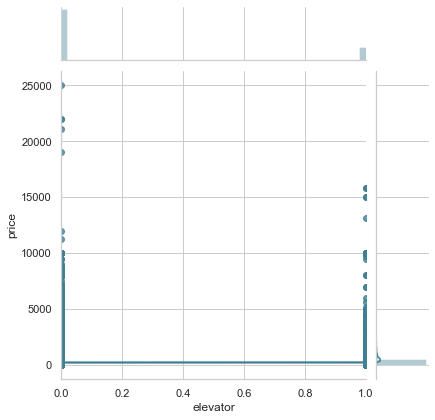

gym:
pearson          0.06       0.00


/Users/gurpreetkaur/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


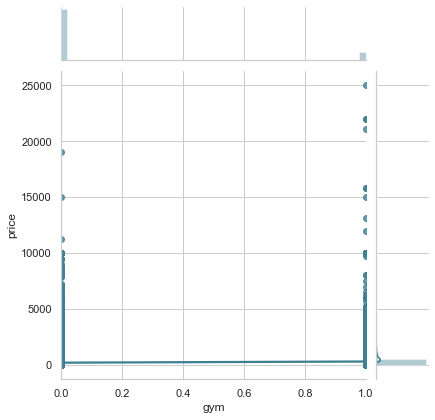

child_friendly:
pearson          0.05       0.00


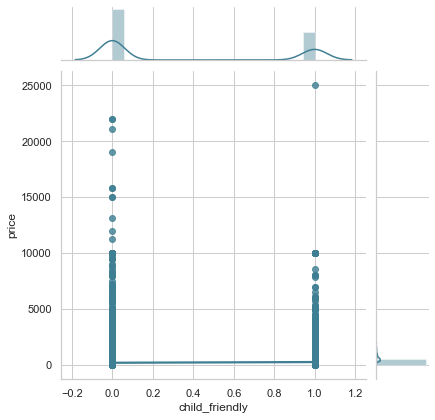

parking:
pearson          0.04       0.00


/Users/gurpreetkaur/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


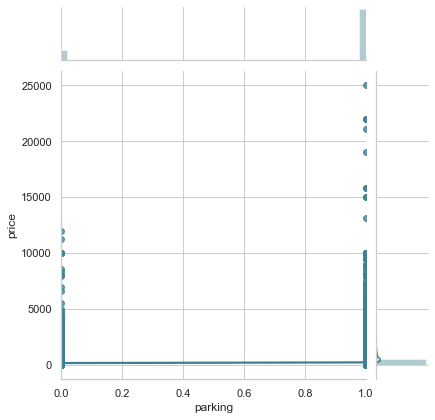

outdoor_space:
pearson          0.03       0.00


/Users/gurpreetkaur/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


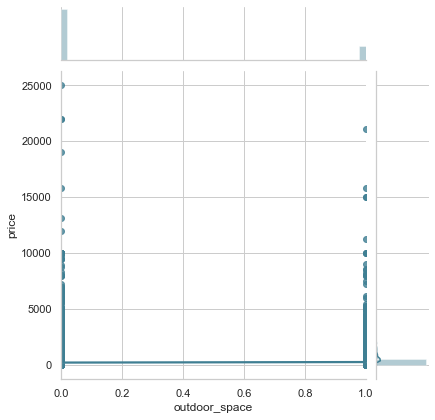

host_greeting:
pearson          0.00       0.52


/Users/gurpreetkaur/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


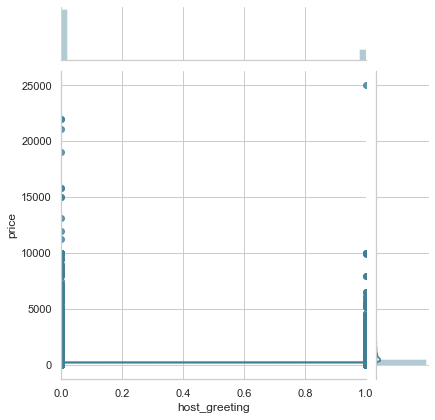

hot_tub_sauna_or_pool:
pearson          0.17       0.00


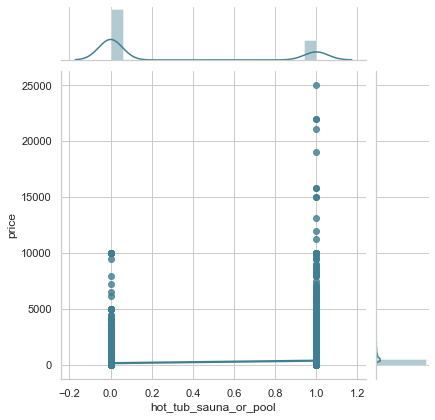

internet:
pearson         -0.00       0.57


/Users/gurpreetkaur/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


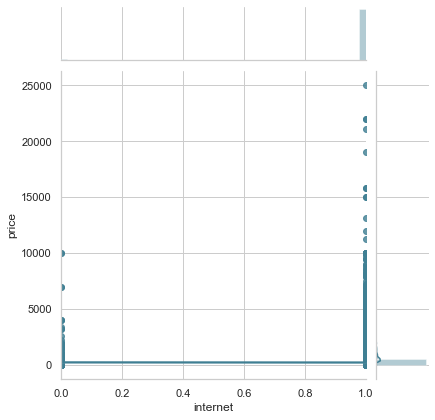

long_term_stays:
pearson          0.00       0.38


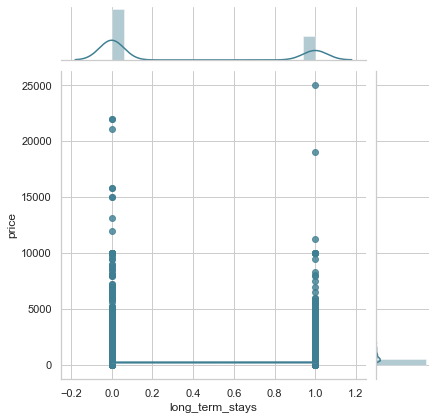

pets_allowed:
pearson          0.04       0.00


/Users/gurpreetkaur/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


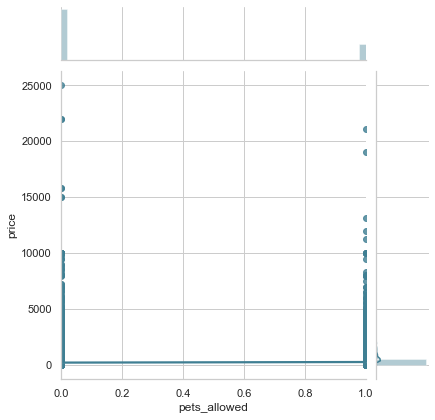

private_entrance:
pearson          0.06       0.00


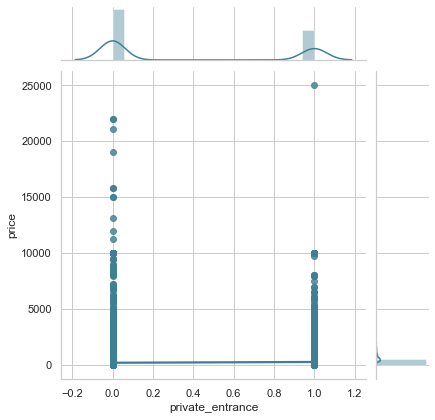

refrigerator:
pearson         -0.03       0.00


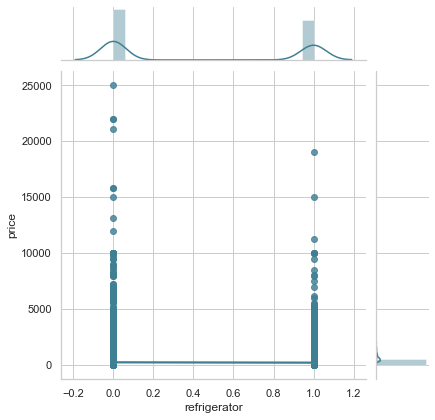

secure:
pearson          0.04       0.00


/Users/gurpreetkaur/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


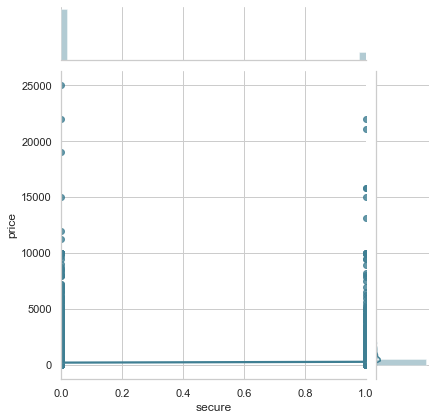

self_check_in:
pearson         -0.05       0.00


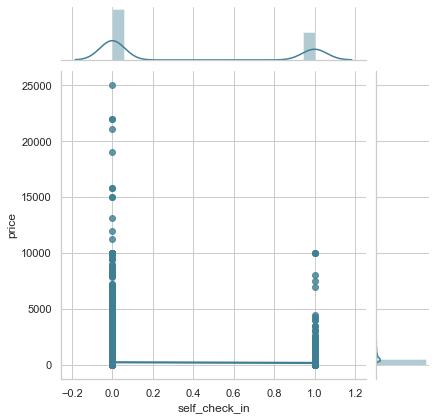

In [26]:
y = 'price'
variables = ['check_in_24h', 'air_conditioning', 'bbq', 'balcony', 'bed_linen',
       'breakfast', 'tv', 'coffee_machine', 'cooking_basics', 'white_goods',
       'elevator', 'gym', 'child_friendly', 'parking', 'outdoor_space',
       'host_greeting', 'hot_tub_sauna_or_pool', 'internet', 'long_term_stays',
       'pets_allowed', 'private_entrance', 'refrigerator', 'secure',
       'self_check_in']

report_numerical_x_vs_numerical_y(variables, y, df)

### Amenities with low degree correlation with listing price:
check_in_24h, air_conditioning, bbq, balcony, bed_linen, breakfast, tv, coffee_machine, white_goods, gym, child_friendly, parking, outdoor_space, hot_tub_sauna_or_pool, pets_allowed, private_entrance, refrigerator, secure, self_check_in
    
### Amenities with no correlation with listing price:
cooking_basics, elevator, host_greeting, internet, long_term_stays

### Dropping columns with no correlation with listing price

In [27]:
df.drop(['cooking_basics','elevator','host_greeting','internet','long_term_stays'], axis=1, inplace=True)

# Explore Data & Engineer Features

Check the price distribution with price and with log price

In [28]:
def get_sub_plots(n_total_cols, n_cols, label_font_size = 14, tick_font_size = 13):
    n_rows = int(n_total_cols / n_cols)
    if n_total_cols % n_cols != 0:
        n_rows += 1

    fig, axes = plt.subplots(nrows = n_rows,
                             ncols = n_cols,
                             squeeze = False)
    
    
    fig.set_size_inches(10 * n_cols, 8 * n_rows)  
    
    if n_total_cols % n_cols != 0:
        for col in range(n_total_cols % n_cols, n_cols):
            fig.delaxes(axes[n_rows - 1][col])

    axes = axes.flatten()
    
    for ax in axes:
        ax.tick_params(labelsize = tick_font_size)
        ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
        ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)

    return (fig, axes)

In [29]:
def plot_ori_vs_log_comparison(x, xlabel, n_total_cols = 2, n_cols = 2, fontsize = 15):
    fig, axes = get_sub_plots(n_total_cols, n_cols)
    style = dict(size = fontsize, color = 'gray')
    
    x = pd.Series(x, name = xlabel)
    log_x = pd.Series(np.log(x), name = 'Taking log on ' + xlabel)

    sns.distplot(x, kde = False, ax = axes[0])
    axes[0].text(600, 550, 'Skew = ' + str(x.skew()), **style)
    axes[0].set_title('Histogram of ' + xlabel, fontsize = fontsize)
    axes[0].set_xlabel(xlabel, fontsize = fontsize)
    axes[0].set_ylabel('Count', fontsize = fontsize)

    sns.distplot(log_x, kde = False, ax = axes[1])
    axes[1].text(5.5, 280, 'Skew = ' + str(log_x.skew()), **style)
    axes[1].set_title('Histogram of ' + xlabel + ' with Log', fontsize = fontsize)
    axes[1].set_xlabel(xlabel + ' with Log', fontsize = fontsize)
    axes[1].set_ylabel('Count', fontsize = fontsize)
    
    fig.tight_layout()    
    plt.show()

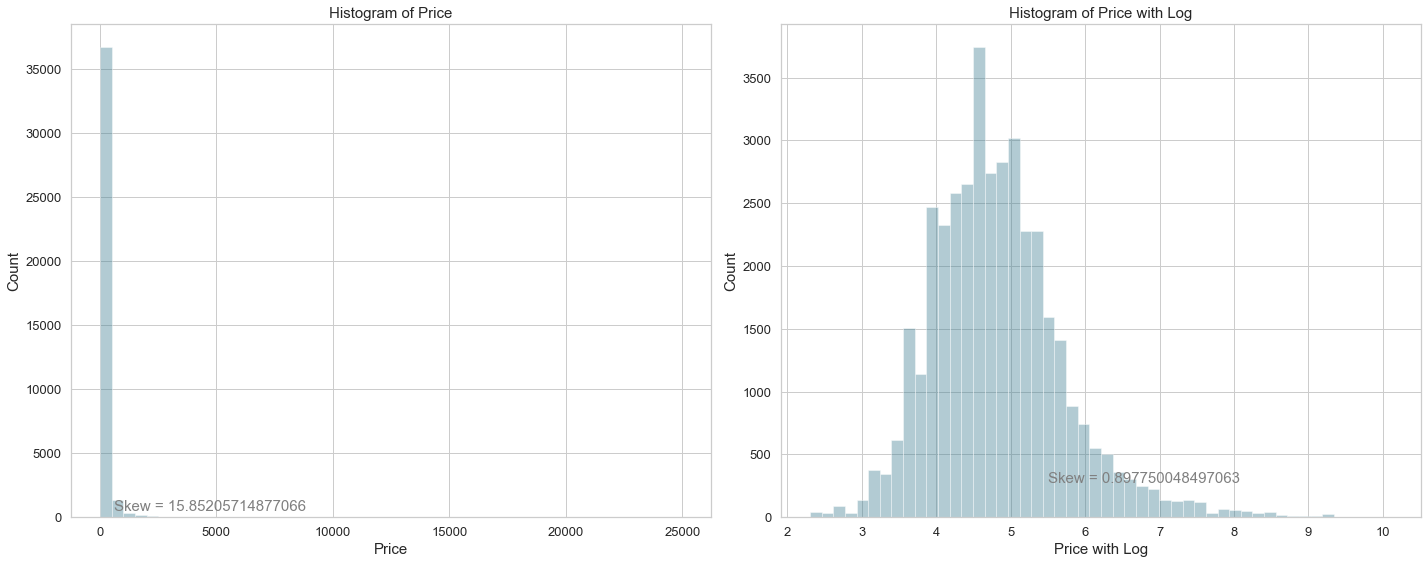

In [30]:
plot_ori_vs_log_comparison(df['price'], 'Price')

Taking log can make it distribute more normally and skew is much improved. It will be better to use logPrice column

In [31]:
# Save dataframe for later
df.to_csv('./Data/data_inferential_statistics.csv', index = False)

# Question 3: Are there strong correlation between an independent and a dependent variable?

As expected, independent variables, like accommodates, bedrooms, bathrooms & beds are correlate with dependent variable, listing price.

# Conclusion

### correlation between an independent and a dependent variable
- accommodates, bedrooms, beds, bathrooms do correlate with price.
- property_type & neighbourhood_cleansed are also correlated with price.

### correlation between pairs of independent variables.
- For numerical variables, I checked correlation by pearson correlation coefficient.
- For categorical variable vs. numerical data, I used logitistic test.